In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
#Transforming df into cufflinks for iplot
import  cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [2]:
covid_confirmed = pd.read_csv('./covid_19_globaldata/time_series_covid19_confirmed_global.csv')
covid_recovered = pd.read_csv('./covid_19_globaldata/time_series_covid19_recovered_global.csv')
covid_death = pd.read_csv('./covid_19_globaldata/time_series_covid19_deaths_global.csv')

In [3]:
covid_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92


In [4]:
covid_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,857,872,877,891,898,898,910,925,938,945
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,692,694,698,733,735,738,741,741,744,751
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,18,18,18,18,18,18,21,24,24,38


In [5]:
covid_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,249,257,265,270,294,300,309,327,357,369
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,33,33,33,33,33,33,34,34,34
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,646,653,661,667,673,681,690,698,707,715
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [6]:
covid_confirmed.rename({'Province/State':'State', 'Country/Region':'Country'}, axis=1, inplace=True) 
covid_death.rename({'Province/State':'State', 'Country/Region':'Country'}, axis=1, inplace=True) 
covid_recovered.rename({'Province/State':'State', 'Country/Region':'Country'}, axis=1, inplace=True)

In [7]:
covid_confirmed.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92


In [8]:
covid_death.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,249,257,265,270,294,300,309,327,357,369
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,33,33,33,33,33,33,34,34,34
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,646,653,661,667,673,681,690,698,707,715
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [9]:
covid_recovered.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,857,872,877,891,898,898,910,925,938,945
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,692,694,698,733,735,738,741,741,744,751
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,18,18,18,18,18,18,21,24,24,38


In [10]:
covid_county = covid_confirmed.drop(['State', 'Lat', 'Long'], axis=1)
covid_county

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,Albania,0,0,0,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,Algeria,0,0,0,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,Andorra,0,0,0,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
4,Angola,0,0,0,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,479,483,484,484,484,485,499,499,513,513
262,Yemen,0,0,0,0,0,0,0,0,0,...,310,323,354,399,419,453,469,482,484,496
263,Comoros,0,0,0,0,0,0,0,0,0,...,106,106,106,132,132,132,132,141,141,141
264,Tajikistan,0,0,0,0,0,0,0,0,0,...,3807,3930,4013,4100,4191,4289,4370,4453,4529,4609


In [11]:
covid_county = covid_county.groupby(by='Country').sum()

In [12]:
covid_county

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
Albania,0,0,0,0,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
Algeria,0,0,0,0,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
Andorra,0,0,0,0,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
Angola,0,0,0,0,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,447,448,449,451,457,464,464,464,472,473
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Yemen,0,0,0,0,0,0,0,0,0,0,...,310,323,354,399,419,453,469,482,484,496


In [13]:
covid_county.iloc[:,-1].sum()

7118471

In [14]:
covid_county.sort_values(by = covid_county.columns[-1], ascending=False).head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Country,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,1770165,1790172,1811020,1831821,1851520,1872660,1897380,1920061,1943647,1960897
Brazil,0,0,0,0,0,0,0,0,0,0,...,498440,514849,526447,555383,584016,614941,645771,672846,691758,707412
Russia,0,0,0,0,0,0,0,0,0,2,...,396575,405843,414328,423186,431715,440538,449256,458102,467073,476043
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,274219,276156,277736,279392,281270,283079,284734,286294,287621,288834
India,0,0,0,0,0,0,0,0,1,1,...,181827,190609,198370,207191,216824,226713,236184,246622,257486,265928
Spain,0,0,0,0,0,0,0,0,0,0,...,239228,239479,239638,239932,240326,240660,240978,241310,241550,241717
Italy,0,0,0,0,0,0,0,0,0,2,...,232664,232997,233197,233515,233836,234013,234531,234801,234998,235278
Peru,0,0,0,0,0,0,0,0,0,0,...,155671,164476,170039,170039,178914,183198,187400,191758,196515,199696
France,0,0,2,3,3,3,4,5,5,5,...,188752,189009,189348,188450,192330,189569,190180,190759,191102,191313


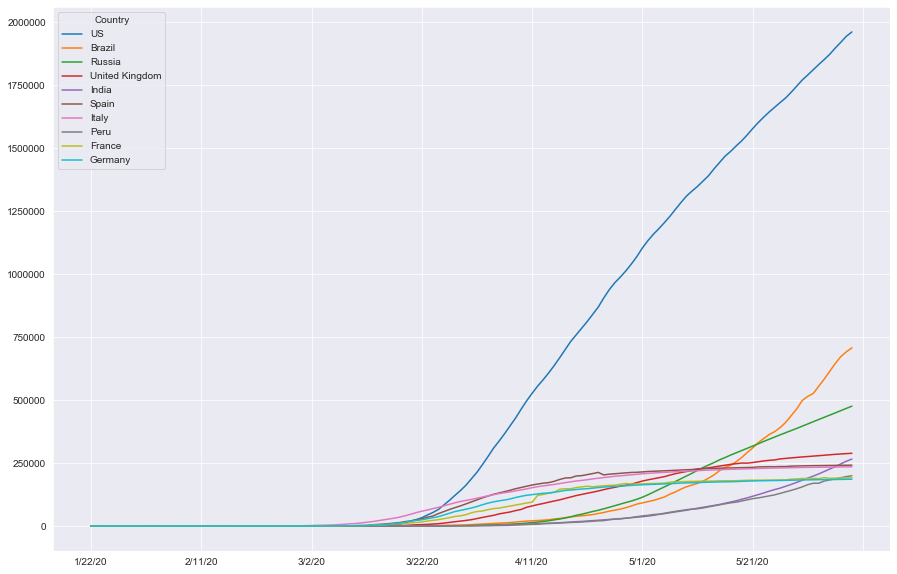

In [15]:
sns.set_style('darkgrid') 
covid_county.sort_values(by = covid_county.columns[-1], ascending=False).head(10).transpose().plot(figsize=(15,10))

In [16]:
sns.set_style('darkgrid') 
covid_county.sort_values(by = covid_county.columns[-1], ascending=False).head(10).transpose().iplot()

In [17]:
covid_county.loc['India'].iplot(title = "Time Series Covid19 Confirmed Cases Visulaization for Republic of India")

In [18]:
covid_county.loc['India'].diff().iplot(title = "Daily Increase in Number Of Cases in India")

## Visualization in Map

In [19]:
import folium

In [20]:
covid_confirmed

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,764,764,765,844,851,852,852,852,852,852
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,84,86,86,86,86,86,86,88,91,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,479,483,484,484,484,485,499,499,513,513
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,310,323,354,399,419,453,469,482,484,496
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,106,106,106,132,132,132,132,141,141,141
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,3807,3930,4013,4100,4191,4289,4370,4453,4529,4609


In [21]:
world_map = folium.Map(location=[10,0], zoom_start=6, max_zoom=10, min_zoom=1, width='100%')
world_map

In [22]:
# location - [latitude, longitude]
world_map = folium.Map(location=[10,0], zoom_start=2, max_zoom=8, min_zoom=1, width='100%', tiles = "CartoDB dark_matter")
for i in range(0, len(covid_confirmed)):
    folium.Circle(location=[ covid_confirmed.iloc[i]['Lat'], covid_confirmed.iloc[i]['Long']], 
                  radius= int(np.log(covid_confirmed.iloc[i, -1]+1.00001))*30000,
                  tooltip="<h5 style='text-align:center;font-weight: bold'>" + covid_confirmed.iloc[i]['Country'] + "</h5>"+ 
                      "<li>Confirmed "+str(covid_confirmed.iloc[i, -1])+ "</li>" +
                      "<li>Deaths "+str(covid_death.iloc[i, -1])+ "</li>", 
                  color= 'red', 
                  fill = True).add_to(world_map)

In [23]:
world_map

## Covide Visualization with Google Map 

In [24]:
import gmaps

In [25]:
!jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [26]:
gmaps.configure(api_key='Use your Google Map API key')

In [27]:
df_gmaps = covid_confirmed.iloc[:,[2,3,-1]]
df_gmaps

,Lat,Long,6/8/20
0,33.000000,65.000000,20917
1,41.153300,20.168300,1263
2,28.033900,1.659600,10265
3,42.506300,1.521800,852
4,-11.202700,17.873900,92
...,...,...,...
261,0.186360,6.613081,513
262,15.552727,48.516388,496
263,-11.645500,43.333300,141
264,38.861034,71.276093,4609


In [28]:
locations = df_gmaps[['Lat','Long']]
##values
values = df_gmaps.iloc[:,-1]

In [29]:
world_map = gmaps.figure()
world_map.add_layer(gmaps.heatmap_layer(locations, values, max_intensity=2000, point_radius=10))
world_map

Figure(layout=FigureLayout(height='420px'))